In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
dir_path = "E:/data mining/final_project/data/"
df = pd.read_csv(dir_path + "train_2019" + ".csv")

In [3]:
def convert_time(month, date, time):
    month_str = str(month)
    date_str = str(date)
    time_str = str(time)
    
    if len(month_str) < 2:
        month_str = '0' + month_str
    if len(date_str) < 2:
        date_str = '0' + date_str
    if len(time_str) < 4:
        for i in range(4 - len(time_str)):
            time_str = '0' + time_str
    if time_str == '2400':
        time_str = '0000'
    
    time_str_new = time_str[0] + time_str[1] + ':' + time_str[2] + time_str[3]
    
    return pd.to_datetime('2019-' + month_str + '-' + date_str + ' ' + time_str_new)

In [4]:
arr_daytime = []
for i in range(df.shape[0]):
    temp = convert_time(df.loc[i]["MONTH"], df.loc[i]["DAY_OF_MONTH"], df.loc[i]["CRS_ARR_TIME"])
    arr_daytime.append(temp)

In [5]:
df["CRS_ARR_DAYTIME"] = arr_daytime
df

,AIRLINE_ID,CARRIER_NAME,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,PREVIOUS_AIRPORT,LATITUDE,LONGITUDE,MONTH,DAY_OF_MONTH,...,ARR_TIME,ARR_DELAY_NEW,CANCELLED,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,CRS_ARR_DAYTIME
0,19805,American Airlines Inc.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1228.0,2.0,0.0,1440.0,NaN,NaN,NaN,NaN,NaN,2019-01-20 12:26:00
1,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1213.0,43.0,0.0,1444.0,43.0,0.0,0.0,0.0,0.0,2019-01-20 11:30:00
2,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,710.0,0.0,0.0,304.0,NaN,NaN,NaN,NaN,NaN,2019-01-20 07:25:00
3,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,914.0,0.0,0.0,507.0,NaN,NaN,NaN,NaN,NaN,2019-01-20 09:30:00
4,19393,Southwest Airlines Co.,14107,PHX,"Phoenix, AZ",NONE,33.436,-112.009,1,20,...,1111.0,0.0,0.0,651.0,NaN,NaN,NaN,NaN,NaN,2019-01-20 11:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216743,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",El Paso International,29.983,-95.340,12,19,...,2133.0,4.0,0.0,224.0,NaN,NaN,NaN,NaN,NaN,2019-12-19 21:29:00
2216744,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Charleston International,29.983,-95.340,12,19,...,2101.0,0.0,0.0,468.0,NaN,NaN,NaN,NaN,NaN,2019-12-19 21:27:00
2216745,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Pittsburgh International,29.983,-95.340,12,19,...,2049.0,0.0,0.0,689.0,NaN,NaN,NaN,NaN,NaN,2019-12-19 21:09:00
2216746,20378,Mesa Airlines Inc.,12266,IAH,"Houston, TX",Norfolk International,29.983,-95.340,12,19,...,2205.0,0.0,0.0,1034.0,NaN,NaN,NaN,NaN,NaN,2019-12-19 22:36:00


In [6]:
df.columns.to_list()

['AIRLINE_ID',
 'CARRIER_NAME',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN',
 'ORIGIN_CITY_NAME',
 'PREVIOUS_AIRPORT',
 'LATITUDE',
 'LONGITUDE',
 'MONTH',
 'DAY_OF_MONTH',
 'AIRPORT_FLIGHTS_MONTH',
 'SEGMENT_NUMBER',
 'TAIL_NUM',
 'MANUFACTURE_YEAR',
 'PLANE_AGE',
 'AWND',
 'PRCP',
 'SNOW',
 'TMAX',
 'TAVG',
 'DEST_AIRPORT_ID',
 'DEST',
 'DEST_CITY_NAME',
 'DEPARTING_AIRPORT',
 'CRS_DEP_TIME',
 'DEP_TIME',
 'DEP_DELAY_NEW',
 'CRS_ARR_TIME',
 'ARR_TIME',
 'ARR_DELAY_NEW',
 'CANCELLED',
 'DISTANCE',
 'CARRIER_DELAY',
 'WEATHER_DELAY',
 'NAS_DELAY',
 'SECURITY_DELAY',
 'LATE_AIRCRAFT_DELAY',
 'CRS_ARR_DAYTIME']

In [7]:
def get_specific_df(airline_id, airport_id, df, airline=True, airport=True):
    if airport and airline:
        df2 = df[(df['AIRLINE_ID'] == airline_id) & (df['DEP_DELAY_NEW'] >= 0)
             & (df['ORIGIN_AIRPORT_ID'] == airport_id)]
    if airport == False and airline == True:
        df2 = df[(df['AIRLINE_ID'] == airline_id) & (df['DEP_DELAY_NEW'] > 0)]
    if airport == True and airline == False:
        df2 = df[(df['ORIGIN_AIRPORT_ID'] == airport_id) & (df['DEP_DELAY_NEW'] > 0)]
    df2.sort_values('CRS_ARR_DAYTIME', inplace = True)
    return df2

In [40]:
def plot_temporal_change(df, airline_id, airport_id, time_range, airline=True, airport=True):
    df2 = get_specific_df(airline_id, airport_id, df, airline, airport)
    df2 = df2.reset_index(drop=True)
    
    plt.figure(figsize=(30,10))
    plt.plot(df2["CRS_ARR_DAYTIME"], df2["ARR_DELAY_NEW"])
    plt.xlim(time_range)
    plt.ylim([-10, 800])
    plt.ylabel("Delay (mins)", fontsize=25)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.show()

D:\anaconda\envs\data_mining_hw\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


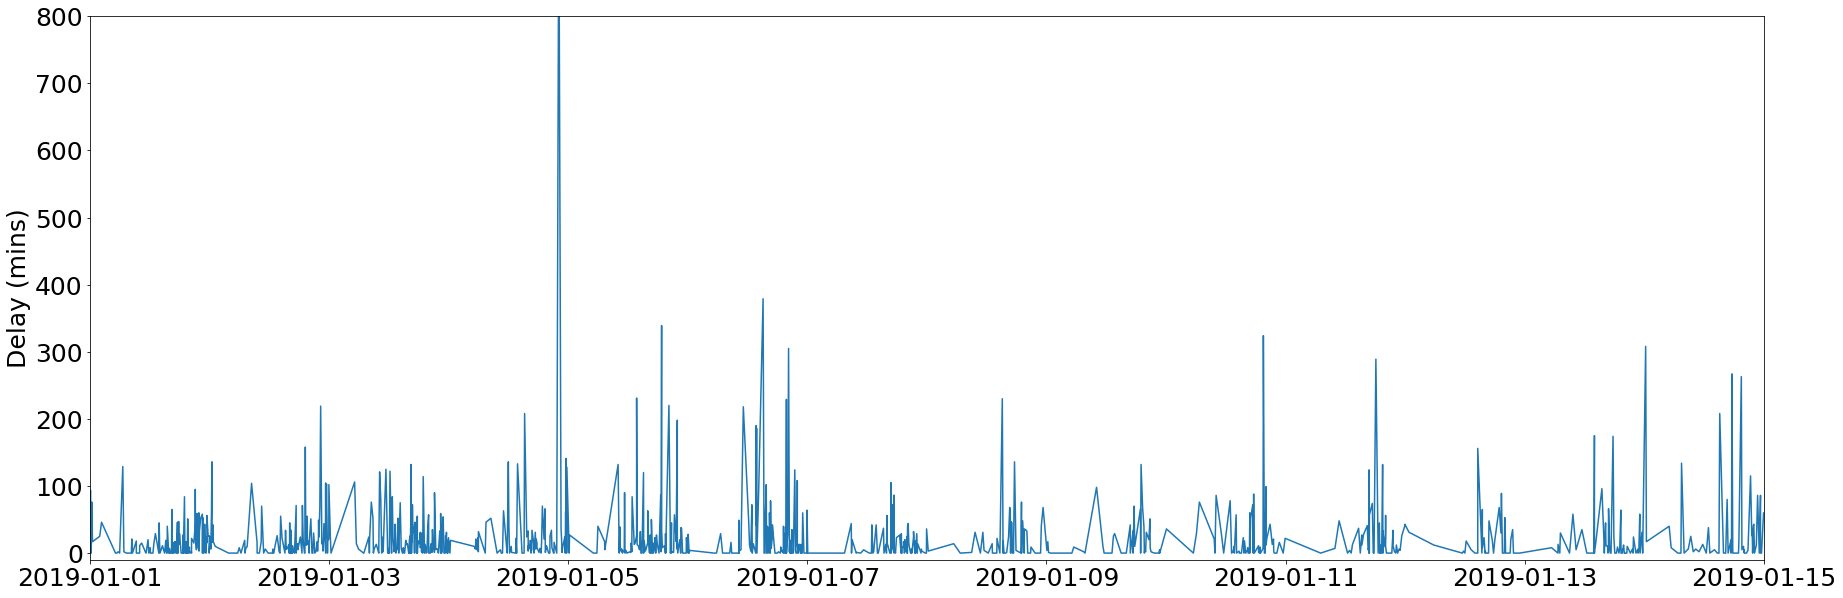

In [41]:
plot_temporal_change(df, 20409, 14107, [datetime.datetime(2019,1,1), datetime.datetime(2019,1,15)], airline=False)

D:\anaconda\envs\data_mining_hw\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


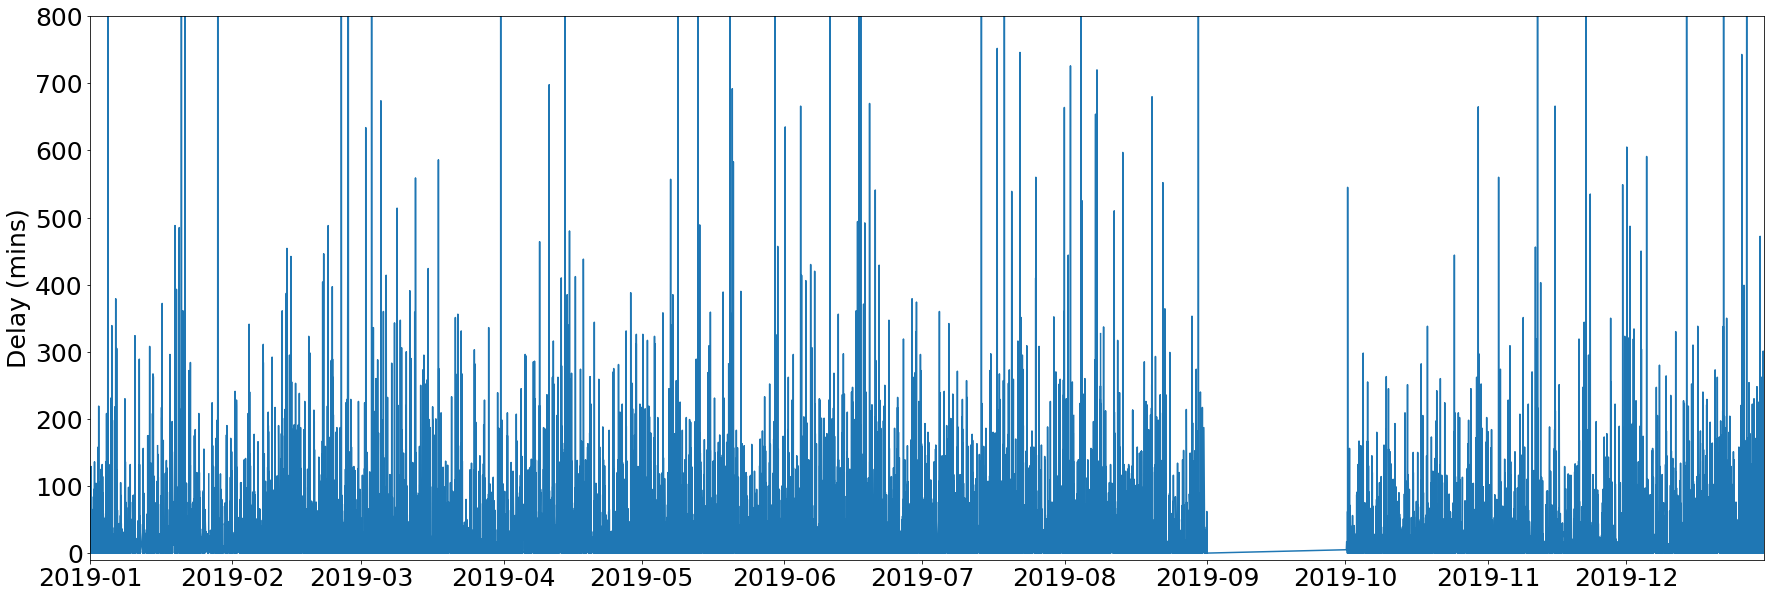

In [43]:
plot_temporal_change(df, 20409, 14107, [datetime.datetime(2019,1,1), datetime.datetime(2019,12,31)], airline=False)

In [13]:
df2 = get_specific_df(20409, 14107, df, airline=False)
df2["ARR_DELAY_NEW"]

1800        93.0
1826         2.0
1741         0.0
1750         0.0
1788        76.0
           ...  
2108416    227.0
2108394     20.0
2108467      0.0
2108397    169.0
2108444     20.0
Name: ARR_DELAY_NEW, Length: 36082, dtype: float64

(-10.0, 50000.0)

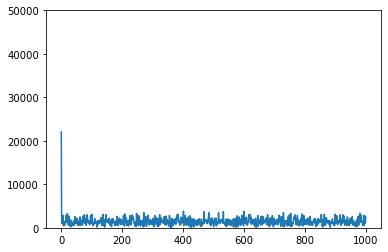

In [36]:
from scipy.fft import fft, ifft
df2 = df2.fillna(0)
df2_fft = fft(df2["ARR_DELAY_NEW"].to_numpy()[:1000])
plt.plot(np.abs(df2_fft))
plt.ylim([-10,50000])